<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML220124_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [419]:
# 회귀 프로젝트 자전거 대여 플랫폼

In [420]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

In [421]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [422]:
csv_path = '/content/drive/MyDrive/ML_MacineLearning/bike.csv'

In [423]:
train = pd.read_csv(csv_path)

In [424]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [426]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [427]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [428]:
datetime = train['datetime']

In [429]:
train['year'] = datetime.dt.year
train['month'] = datetime.dt.month
train['day'] = datetime.dt.day
train['hour'] = datetime.dt.hour
train['minute'] = datetime.dt.minute
train['second'] = datetime.dt.second

In [430]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [431]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


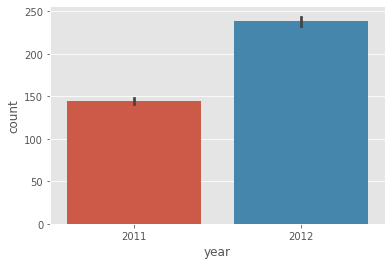

In [432]:
sns.barplot(data = train, x = 'year', y = 'count')

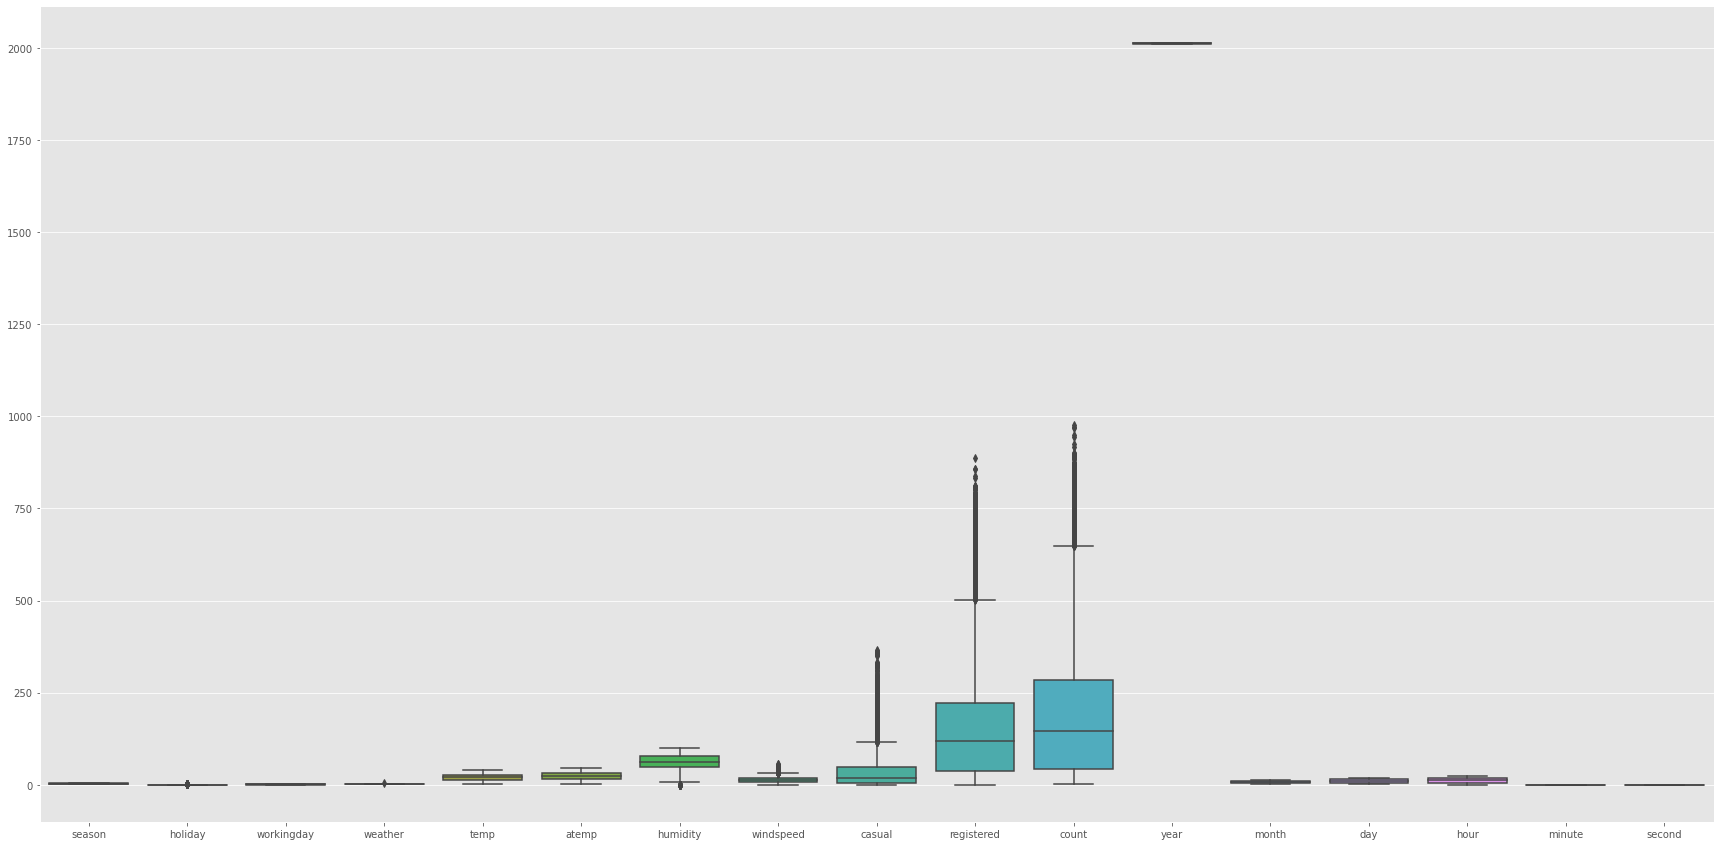

In [433]:
plt.figure(figsize = (30, 15))
sns.boxplot(data = train)
plt.show()

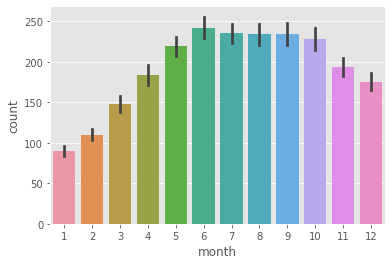

In [434]:
sns.barplot(data = train, x = 'month', y = 'count')

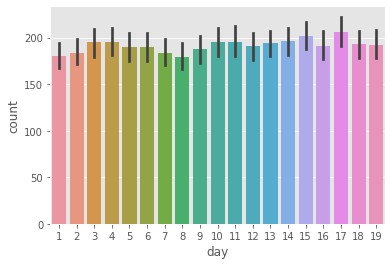

In [435]:
sns.barplot(data = train, x = 'day', y = 'count')

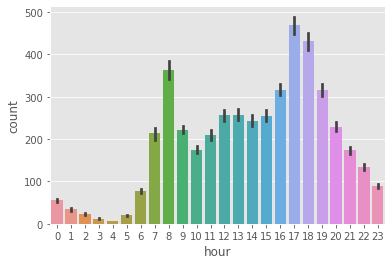

In [436]:
sns.barplot(data = train, x = 'hour', y = 'count')

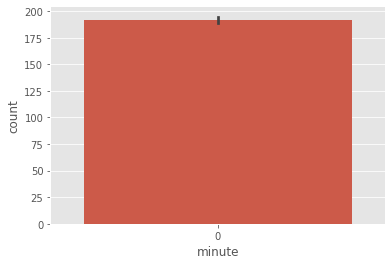

In [437]:
sns.barplot(data = train, x = 'minute', y = 'count')

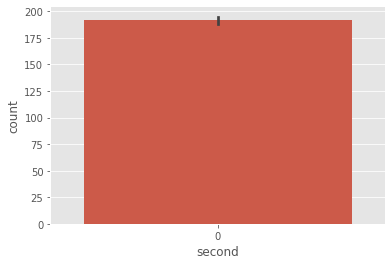

In [438]:
sns.barplot(data = train, x = 'second', y = 'count')

In [439]:
# datetime dayofweek 0 : 월, 1 : 화 ~ 6: 일
train['dayofweek'] = datetime.dt.dayofweek

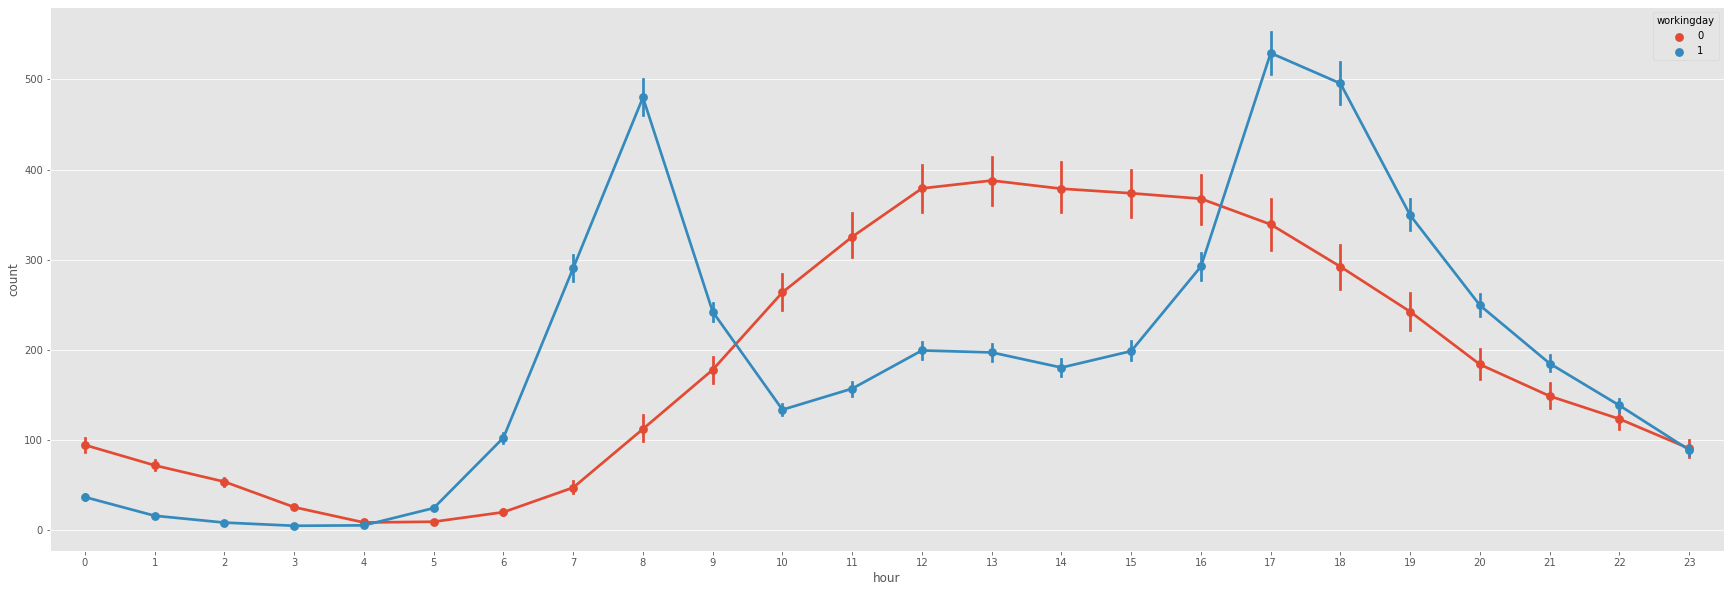

In [440]:
plt.figure(figsize = (30, 10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

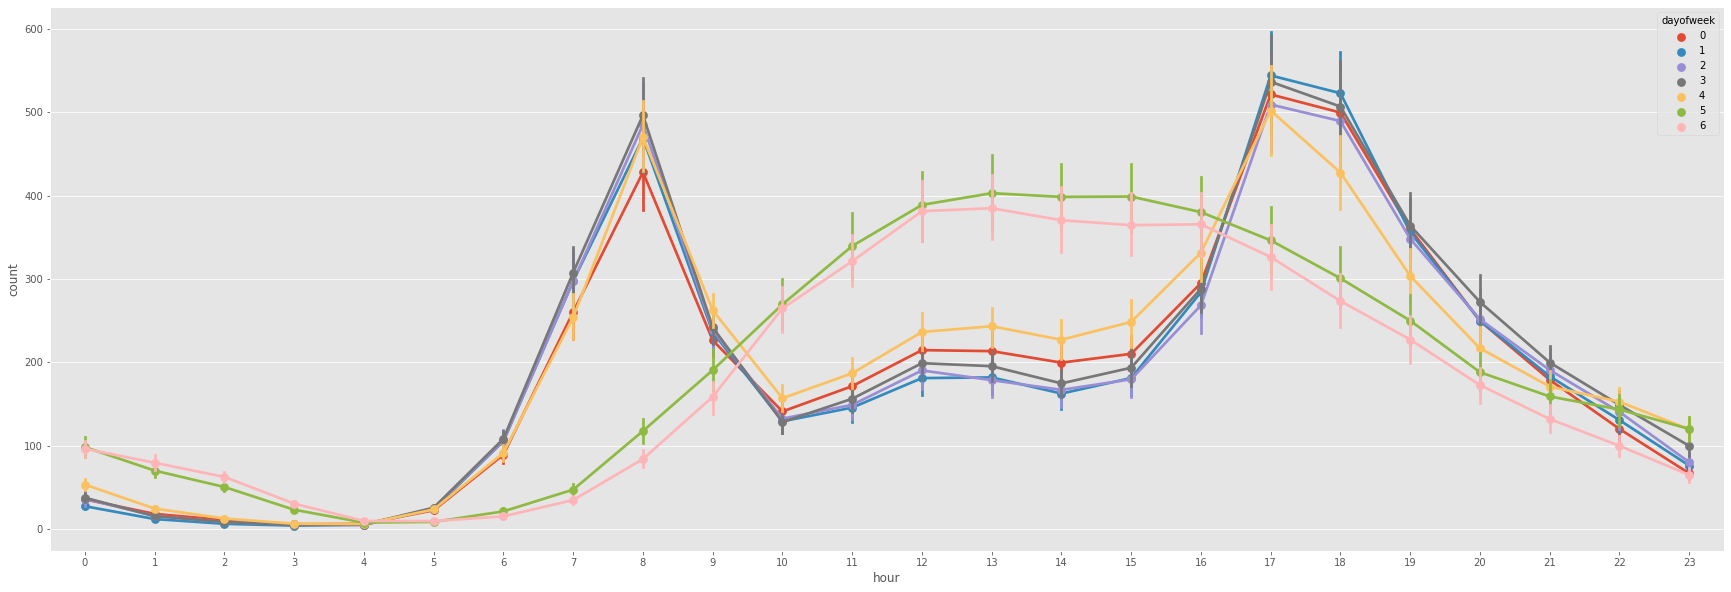

In [441]:
plt.figure(figsize = (30, 10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

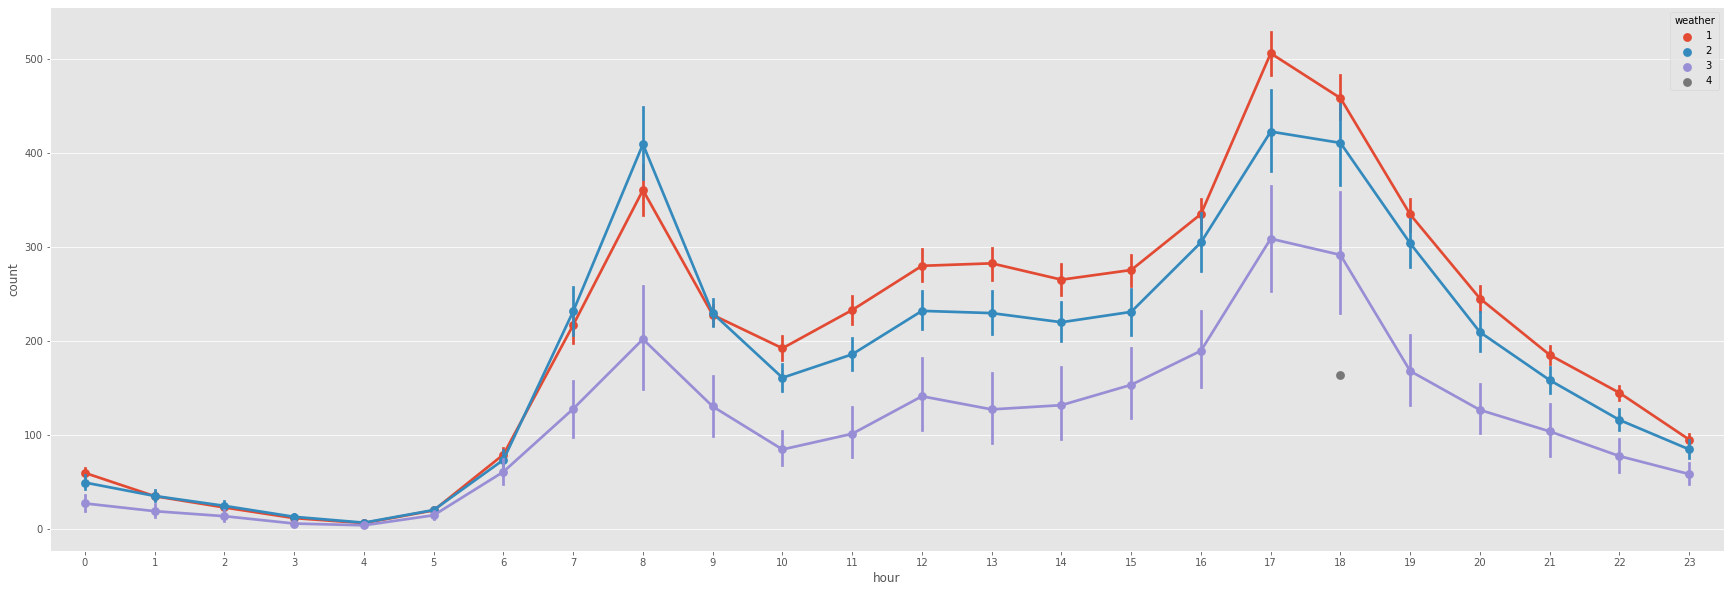

In [442]:
plt.figure(figsize = (30, 10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

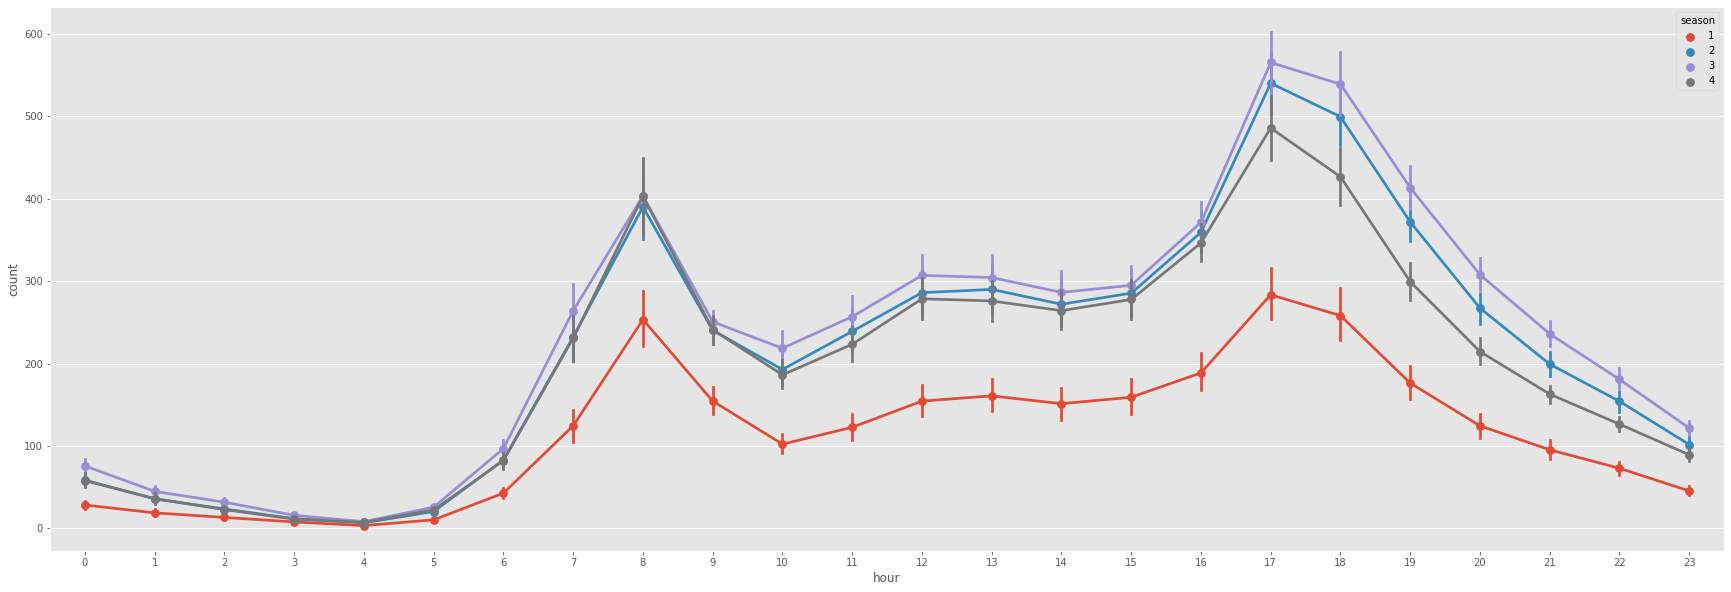

In [443]:
plt.figure(figsize = (30, 10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

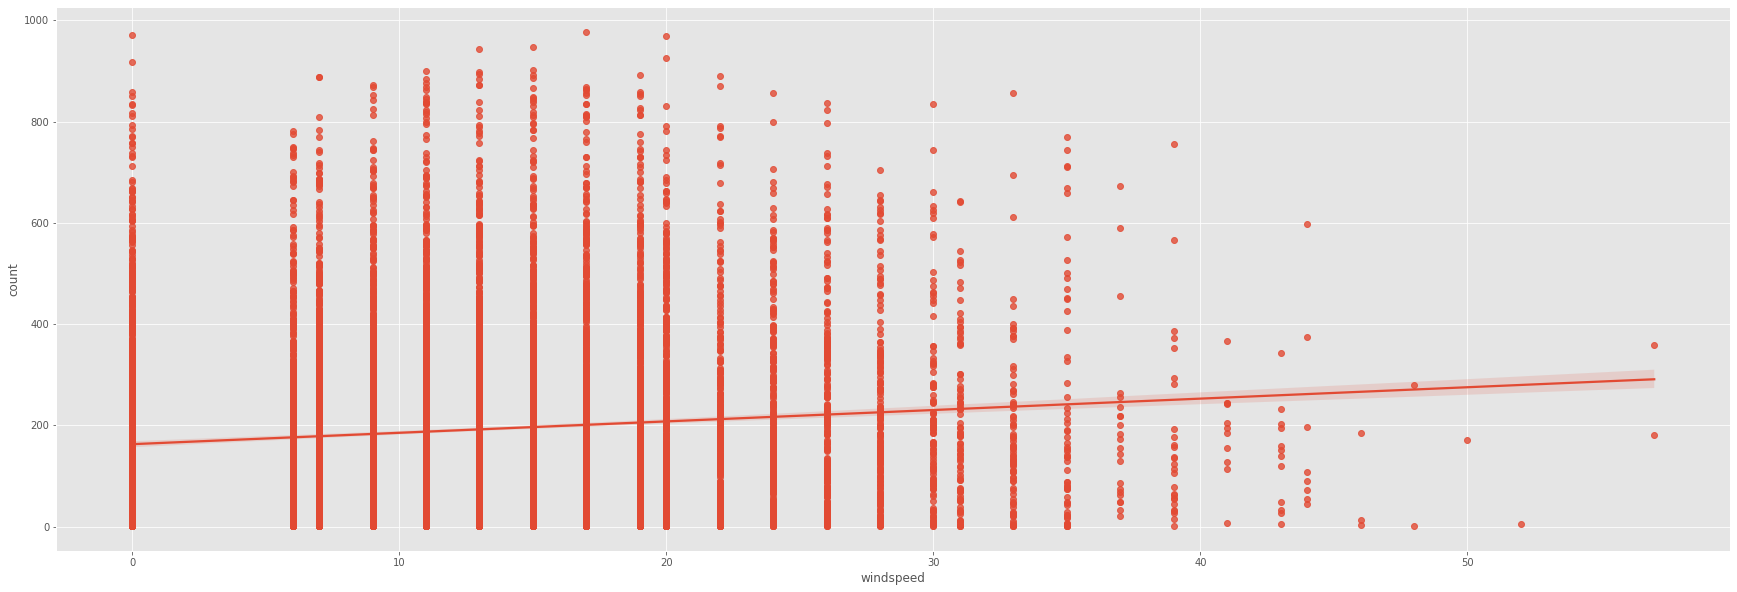

In [444]:
plt.figure(figsize = (30, 10))
sns.regplot(data = train, x = 'windspeed', y = 'count')

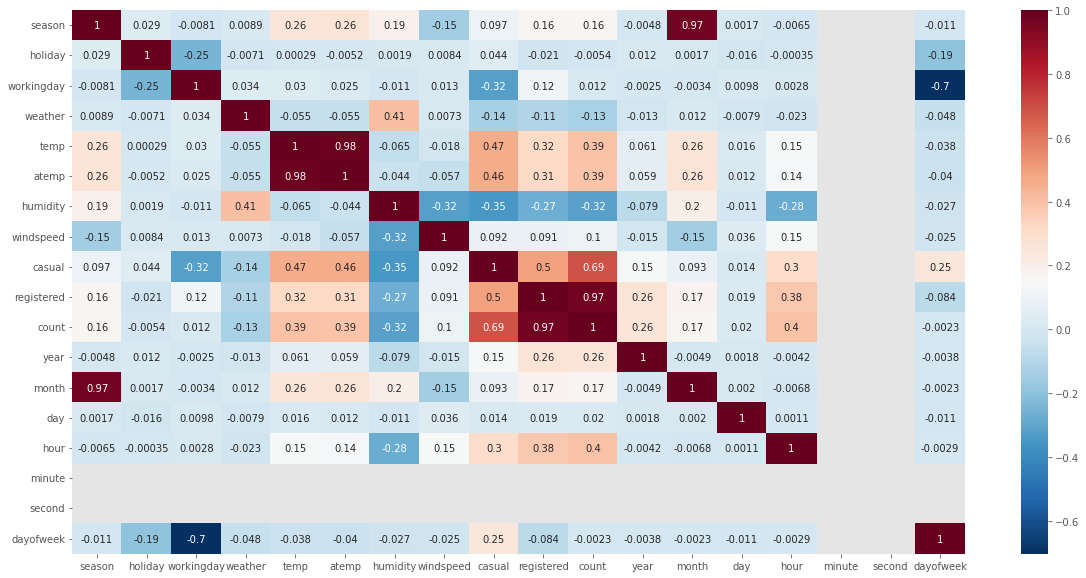

In [445]:
# train 데이터의 상관계수를 히트맵으로 출력
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr(), annot = True, cmap = 'RdBu_r')

In [446]:
# 'count - > causal', season - > month, workingday -> dayofweek, 

In [447]:
y = train['count']
y.head()

# target data

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [448]:
X = train.copy()
X.pop('count')
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,0,5


In [449]:
X.pop('datetime')
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10886, dtype: int64

In [450]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5


In [451]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2 , random_state = 156)

In [452]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor ( random_state = 0 )

rf_model

RandomForestRegressor(random_state=0)

In [453]:
# X_train 을 독립 변수로, y_train을 예측하는 의사 결정 트리들을 생성
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [454]:
# X_test를 독립변수로 자전거 대여 횟수를 예측해보기
pred = rf_model.predict(X_test)

In [455]:
from sklearn.metrics import mean_squared_error
print("MSE : ", mean_squared_error(y_test, pred))

MSE :  1508.207127363649


In [456]:
# 이상치제거

In [457]:
q1 = np.percentile(train['count'], 25)
q1

42.0

In [458]:
q3 = np.percentile(train['count'], 75)
IQR = q3 - q1

In [459]:
IQR

242.0

In [460]:
trainWithoutOutliers = train[(train['count']>= q1 - (1.5 * IQR)) & (train['count']<=(q3 * 1.5 *IQR))]

In [461]:
trainWithoutOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [462]:
train = trainWithoutOutliers.copy()
train.reset_index

<bound method DataFrame.reset_index of                  datetime  season  holiday  ...  minute  second  dayofweek
0     2011-01-01 00:00:00       1        0  ...       0       0          5
1     2011-01-01 01:00:00       1        0  ...       0       0          5
2     2011-01-01 02:00:00       1        0  ...       0       0          5
3     2011-01-01 03:00:00       1        0  ...       0       0          5
4     2011-01-01 04:00:00       1        0  ...       0       0          5
...                   ...     ...      ...  ...     ...     ...        ...
10881 2012-12-19 19:00:00       4        0  ...       0       0          2
10882 2012-12-19 20:00:00       4        0  ...       0       0          2
10883 2012-12-19 21:00:00       4        0  ...       0       0          2
10884 2012-12-19 22:00:00       4        0  ...       0       0          2
10885 2012-12-19 23:00:00       4        0  ...       0       0          2

[10886 rows x 19 columns]>

In [463]:
train.iloc[6610:6615, :]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,0,0
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,3,12,18,0,0,0
6612,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,0,0
6613,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,0,0
6614,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,0,0


In [464]:
train.shape

(10886, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


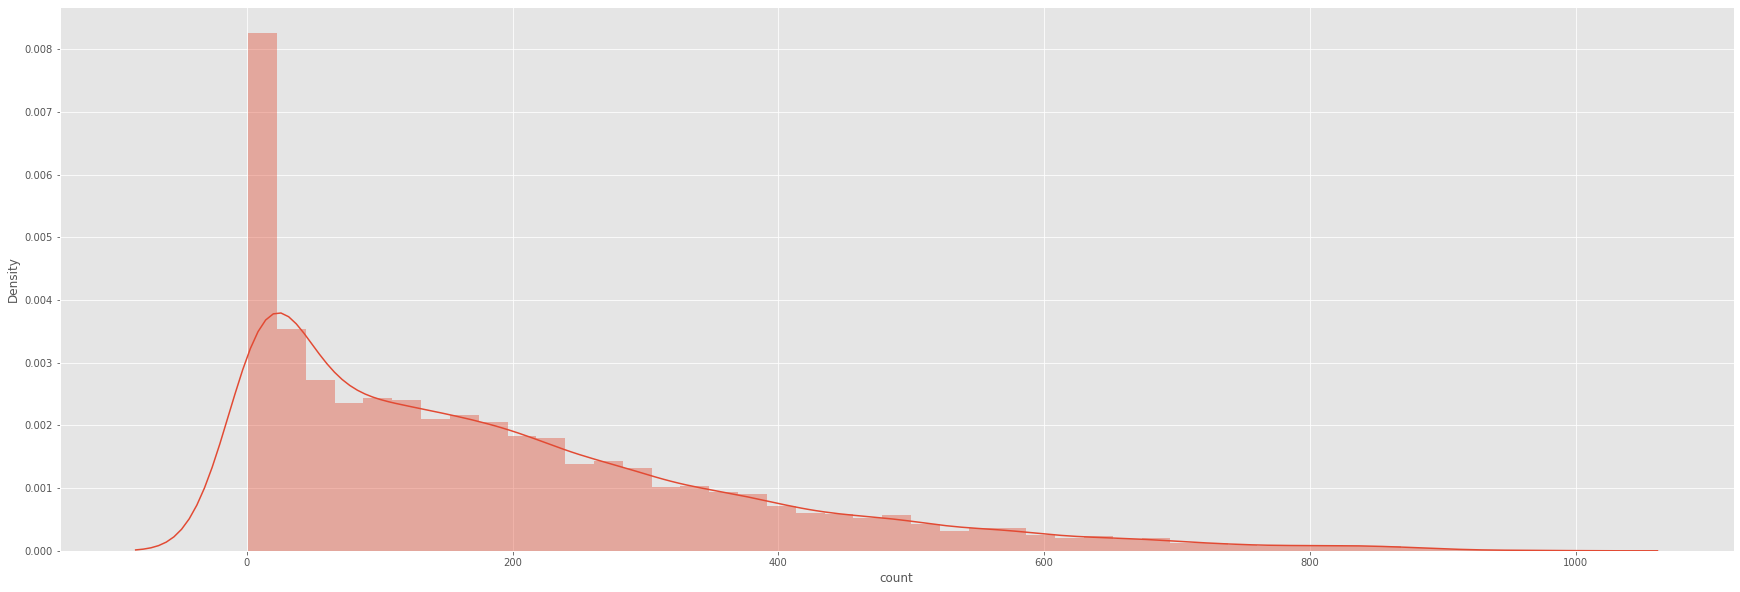

In [465]:
plt.figure(figsize = (30, 10))
sns.distplot(train['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


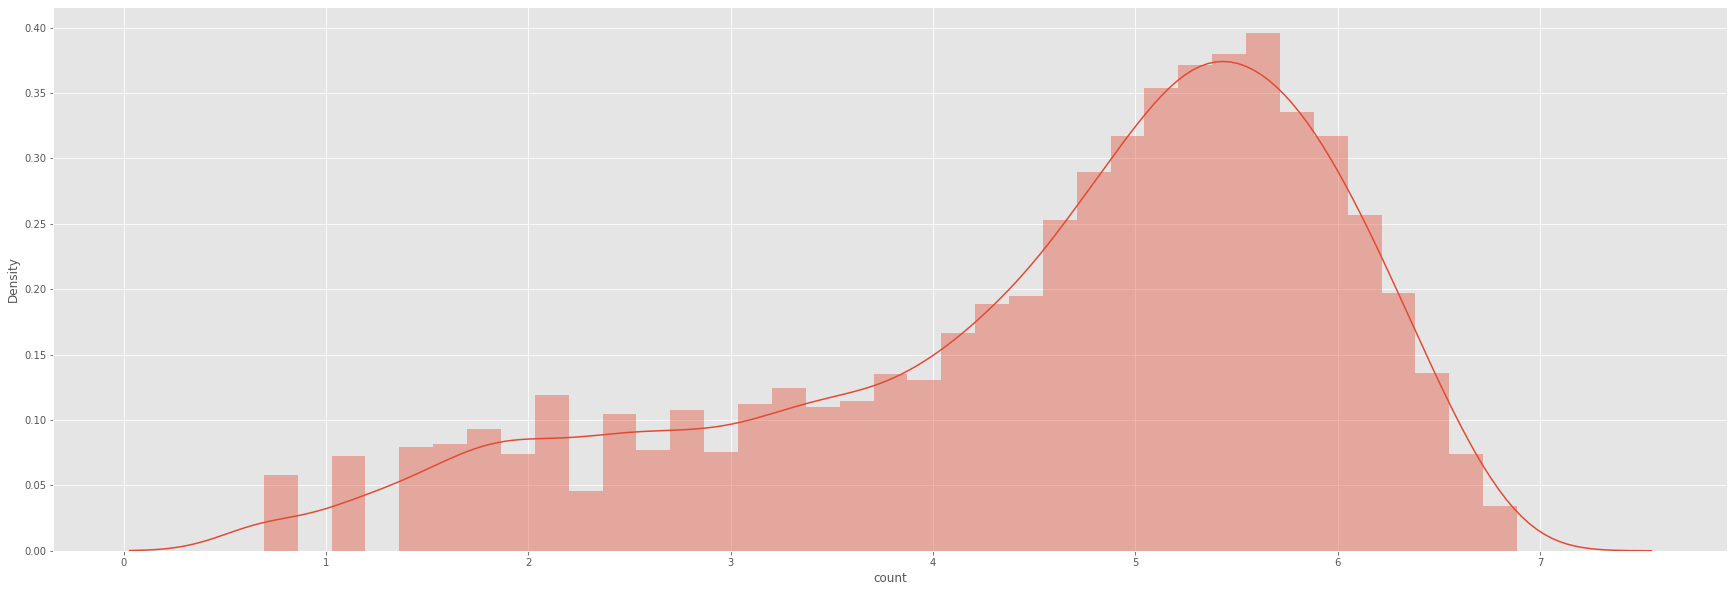

In [466]:
train["count"] = np.log1p(train['count'])
plt.figure(figsize = (30, 10))

sns.distplot(train['count'])

In [467]:
y = train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [468]:
X = train.copy()
X.pop('count')
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,0,5


In [469]:
X = train.copy()
X.pop('count')
X.pop('datetime')
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10886, dtype: int64

In [470]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [471]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    random_state = 0
)

In [472]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [473]:
pred = rf_model.predict(X_test)

In [474]:
pred

array([3.42299679, 6.32139237, 4.47121818, ..., 5.73452547, 4.99275591,
       5.78424863])

In [475]:
print("MSE : ", mean_squared_error(y_test, pred))

MSE :  0.09224801031788796


## 결측치 제거

In [476]:
trainWind0 = train[train['windspeed'] == 0]
trainNotWind0 = train[train['windspeed'] != 0]

In [477]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,5.451038,2012,12,17,12,0,0,0
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,5.356586,2012,12,17,15,0,0,0
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,6.496775,2012,12,18,8,0,0,1
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,4.890349,2012,12,18,22,0,0,1


In [478]:
trainNotWind0['windspeed'].mean()

14.554916786796646

In [479]:
train['windspeed'] = np.where(train['windspeed'] == 0,trainNotWind0['windspeed'].mean(), train['windspeed'])

In [480]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,14.554917,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,14.554917,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,14.554917,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,14.554917,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,14.554917,0,1,0.693147,2011,1,1,4,0,0,5


In [481]:
# peak 칼럼 추가
train['peak'] = 0

In [482]:
for idx in range(len(train)) :
  # idx 행의 workingday열의 데이터를 workingay 에 대입
  workingday = train.loc[idx, 'workingday']
  hour = train.loc[idx, 'hour']
  print("index: ", idx)
  print("workingday: ", workingday)
  print("hour: ", hour)
  # workingday == 1 근무일
  if workingday == 1 :
    if hour == 8 or (17 <= hour <= 18) :
      train.loc[idx, 'peak'] = 1
  else :
    if 10 <= hour <= 19 :
      train.loc[idx, 'peak'] = 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
workingday:  1
hour:  12
index:  9220
workingday:  1
hour:  13
index:  9221
workingday:  1
hour:  14
index:  9222
workingday:  1
hour:  15
index:  9223
workingday:  1
hour:  16
index:  9224
workingday:  1
hour:  17
index:  9225
workingday:  1
hour:  18
index:  9226
workingday:  1
hour:  19
index:  9227
workingday:  1
hour:  20
index:  9228
workingday:  1
hour:  21
index:  9229
workingday:  1
hour:  22
index:  9230
workingday:  1
hour:  23
index:  9231
workingday:  0
hour:  0
index:  9232
workingday:  0
hour:  1
index:  9233
workingday:  0
hour:  2
index:  9234
workingday:  0
hour:  3
index:  9235
workingday:  0
hour:  4
index:  9236
workingday:  0
hour:  5
index:  9237
workingday:  0
hour:  6
index:  9238
workingday:  0
hour:  7
index:  9239
workingday:  0
hour:  8
index:  9240
workingday:  0
hour:  9
index:  9241
workingday:  0
hour:  10
index:  9242
workingday:  0
hour:  11
index:  9243
workingday:  0
hour:  12
index:  9244
workingday:  0
hour:  13

In [483]:
train[train['peak'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,0,0,5,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,0,0,5,1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,0,0,5,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,0,0,5,1
14,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,4.672829,2011,1,1,14,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,6.350886,2012,12,18,17,0,0,1,1
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,6.265301,2012,12,18,18,0,0,1,1
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,6.520621,2012,12,19,8,0,0,2,1
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,6.333280,2012,12,19,17,0,0,2,1


In [484]:
# ideal 컬럼추가
# 온도가 27도 초과이고, windspeed<30 미만이면

In [485]:
train['ideal'] = 0

In [486]:
for idx in range(len(train)) :
  if(train.loc[idx, 'temp'] > 27) & (train.loc[idx, 'windspeed'] < 20) :
    # ideal 컬럼에 1 대입
    train.loc[idx, 'ideal'] = 1

In [487]:
train[train['ideal'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak,ideal
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.999500,73,118,5.257495,2011,2,18,14,0,0,4,0,1
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.001200,68,164,5.451038,2011,2,18,16,0,0,4,0,1
1289,2011-03-18 14:00:00,1,0,1,1,27.06,31.060,39,16.997900,71,103,5.164786,2011,3,18,14,0,0,4,0,1
1291,2011-03-18 16:00:00,1,0,1,1,27.88,31.820,39,19.001200,67,137,5.323010,2011,3,18,16,0,0,4,0,1
1293,2011-03-18 18:00:00,1,0,1,1,27.88,31.820,39,11.001400,84,247,5.805135,2011,3,18,18,0,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,2012-10-05 15:00:00,4,0,1,1,29.52,32.575,39,16.997900,150,320,6.154858,2012,10,5,15,0,0,4,0,1
9631,2012-10-05 16:00:00,4,0,1,1,29.52,32.575,37,14.554917,153,481,6.453625,2012,10,5,16,0,0,4,0,1
9632,2012-10-05 17:00:00,4,0,1,1,28.70,31.820,42,11.001400,158,742,6.803505,2012,10,5,17,0,0,4,1,1
9651,2012-10-06 12:00:00,4,0,0,1,28.70,32.575,54,7.001500,362,381,6.612041,2012,10,6,12,0,0,5,1,1


In [488]:
# 컬럼추가 sticky

In [489]:
train['sticky'] = 0

In [490]:
for idx in range(len(train)) :
  if (train.loc[idx, 'humidity']>=60) & (train.loc[idx, 'workingday'] == 1) :
    train.loc[idx, 'sticky'] = 1 

In [491]:
train['sticky']

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    1
10884    1
10885    1
Name: sticky, Length: 10886, dtype: int64

In [492]:
train['year'] = np.where(train['year'] == 2011, 0, 1)

train['year'].value_counts()

1    5464
0    5422
Name: year, dtype: int64

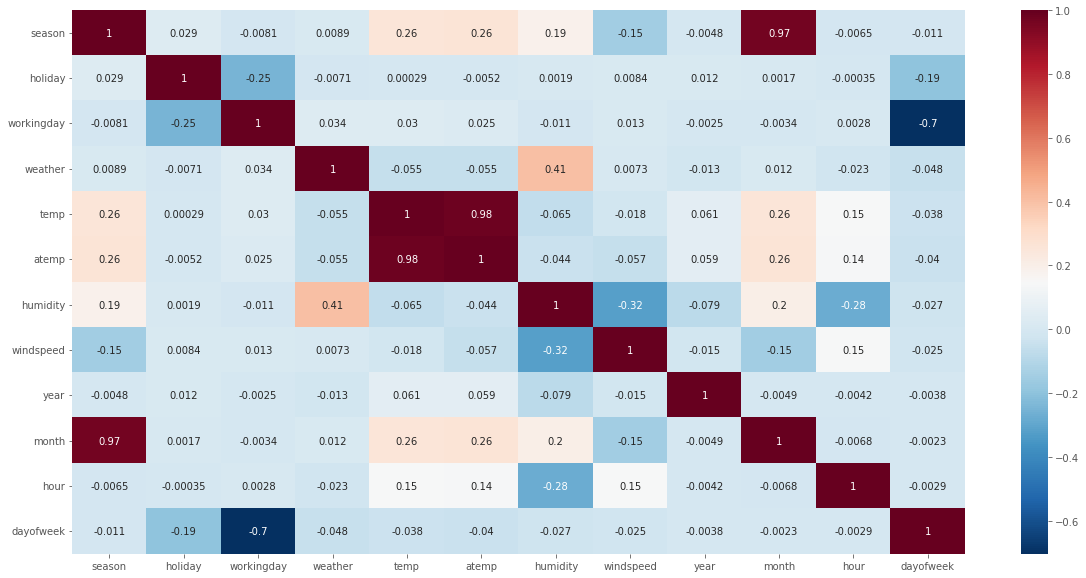

In [493]:
# train 데이터의 상관계수를 히트맵으로 출력
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(X.corr(), annot = True, cmap = 'RdBu_r')

In [494]:
y = train['count']

In [495]:
X = train.copy()

In [496]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,14.554917,3,13,2.833213,0,1,1,0,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,14.554917,8,32,3.713572,0,1,1,1,0,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,14.554917,5,27,3.496508,0,1,1,2,0,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,14.554917,3,10,2.639057,0,1,1,3,0,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,14.554917,0,1,0.693147,0,1,1,4,0,0,5,0,0,0


In [497]:
train['year']

0        0
1        0
2        0
3        0
4        0
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: year, Length: 10886, dtype: int64

In [498]:
X.pop('datetime')
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')
X.pop('count')

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 156)

In [523]:
rf_model = RandomForestRegressor ( random_state = 0)
rf_model

RandomForestRegressor(random_state=0)

In [524]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [525]:
pred = rf_model.predict(X_test)

In [526]:
print("MSE : ", mean_squared_error(y_test, pred))

MSE :  0.09466914522289341


In [527]:
rf_model.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=209652396)

In [528]:
import pydotplus
from sklearn import tree

In [529]:
dt_dot_data = tree.export_graphviz(
    rf_model.estimators_[0],
    feature_names = X.columns,
    special_characters = True,
    filled = True,
    rounded = True
)

In [530]:
# dt_dot_data

In [531]:
# dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
# dt_graph

In [532]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators = 150,
    max_depth = 5,
    random_staete =0,
    min_child_weight = 7,
    learning_rate = 0.1
)

In [533]:
model_xgb.fit(X_train, y_train)

pred = model_xgb.predict(X_test)
pred

[06:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([3.4106002, 6.3605003, 4.557645 , ..., 0.9453726, 6.28374  ,
       5.4250336], dtype=float32)

In [534]:
print("MSE : ", mean_squared_error(y_test, pred))

MSE :  0.08626896410587524


In [535]:
model_xgb.feature_importances_

array([0.06719051, 0.00295295, 0.11328906, 0.02484865, 0.04737432,
       0.01223866, 0.00930673, 0.00290336, 0.08115537, 0.03772419,
       0.30513847, 0.02753379, 0.26106778, 0.00388671, 0.00338944],
      dtype=float32)

In [536]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model_xgb, X_train, y_train, return_train_score = True, n_jobs = -1)

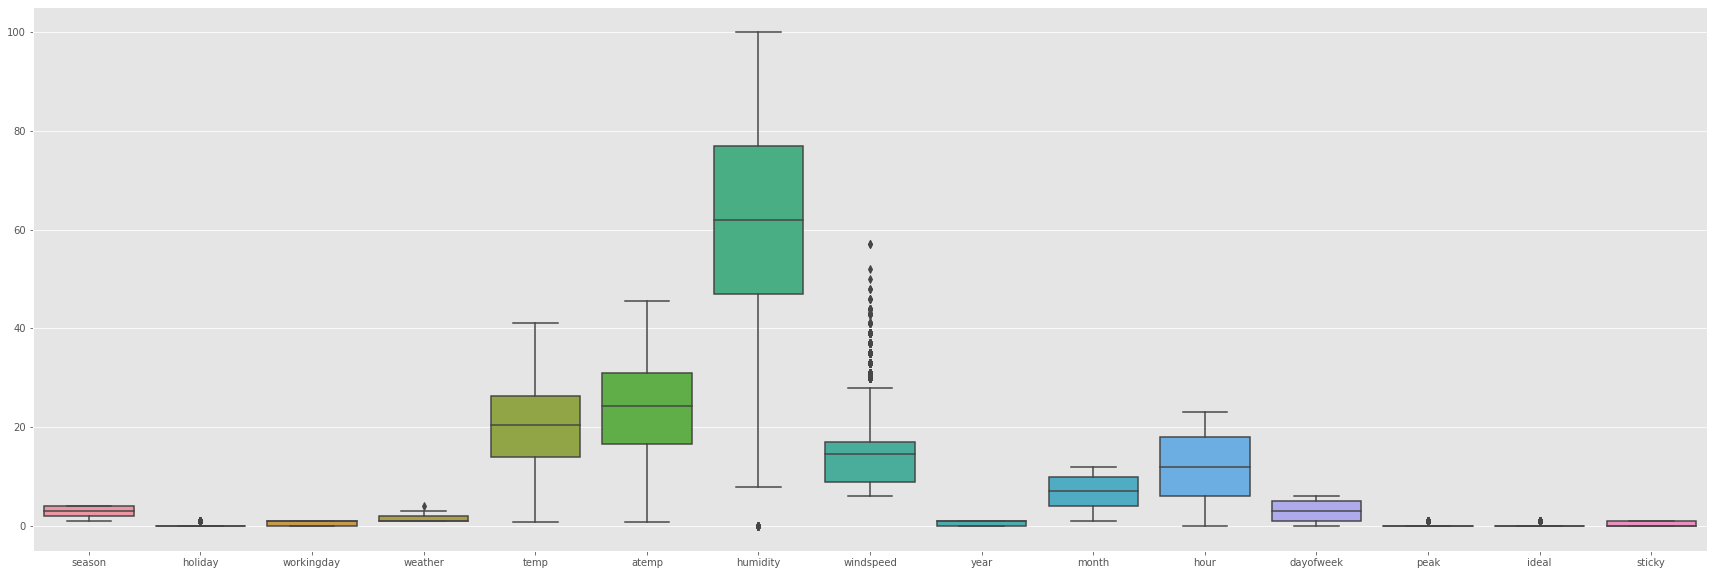

In [537]:
plt.figure(figsize = (30, 10))
sns.boxplot(data = X)
plt.show()

In [515]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9722232422677557 0.9574220180549642


In [516]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train,y_train)
lgbm_pred = lgbm.predict(X_test)

In [517]:
lgbm_pred

array([3.26810645, 6.35621153, 4.54602308, ..., 6.03010872, 5.00291929,
       5.92043728])

In [518]:
print("MSE : ", mean_squared_error(y_test,lgbm_pred))

MSE :  0.08113586968233234


In [519]:
gs.fit(X_train, y_train)

[06:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(estimator=XGBRegressor(random_state=156), n_jobs=-1,
             param_grid={'min_impurity_secrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

## Xgboost Check

In [521]:
model_xgb.feature_importances_

array([0.06552346, 0.00278112, 0.10696705, 0.02606492, 0.04483755,
       0.01809297, 0.00878138, 0.00326094, 0.0831681 , 0.04003069,
       0.31842077, 0.03193274, 0.24152602, 0.00571899, 0.0028934 ],
      dtype=float32)